c:\Users\abhay\anaconda3\envs\yolov5-env\lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


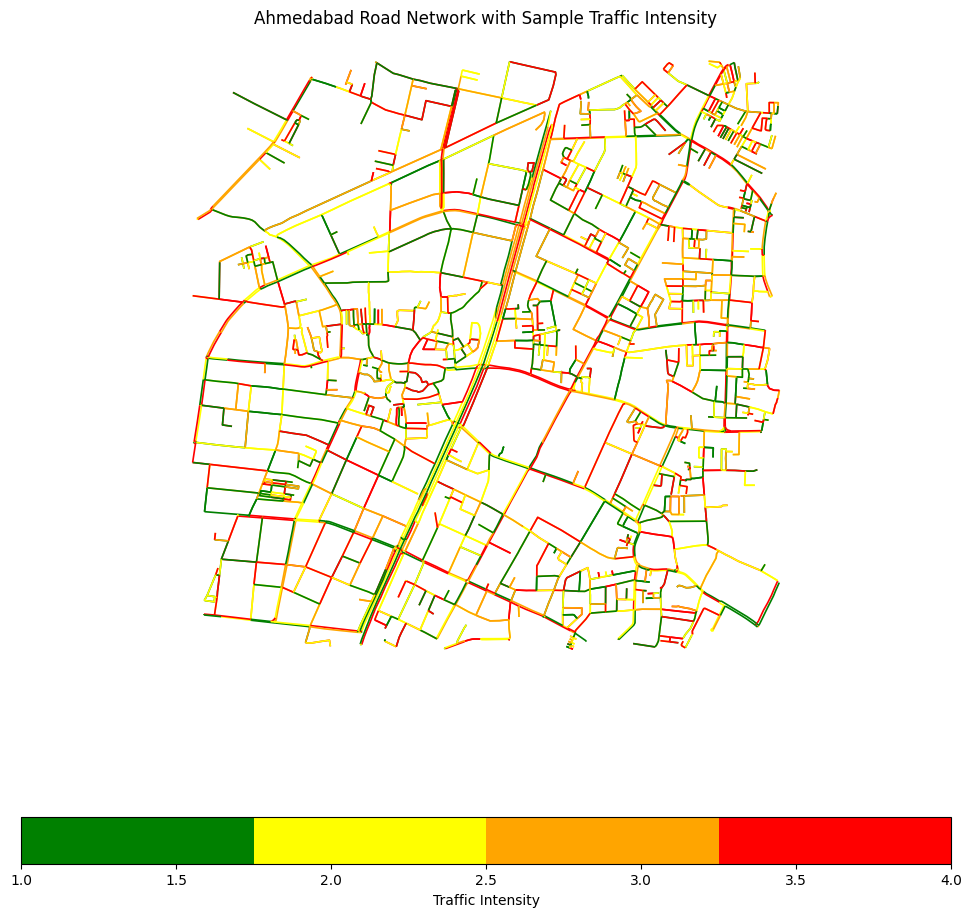

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Define location and distance for Ahmedabad
location = (23.050563887729403, 72.51763363854504)  # Ahmedabad coordinates
distance = 2000  # Define radius distance in meters

# Fetch the road network for Ahmedabad within a limited distance using OSMnx
# This downloads only 'drive' type roads within 2 km for faster rendering
G = ox.graph_from_point(location, dist=distance, network_type='drive')
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

# Generate random traffic intensity values for each road segment (1-4, with 4 being high congestion)
np.random.seed(42)  # For consistent random values
gdf_edges['traffic_intensity'] = np.random.randint(1, 5, size=len(gdf_edges))

# Create a colormap to represent traffic intensity: green (low) to red (high)
cmap = ListedColormap(['green', 'yellow', 'orange', 'red'])

# Plot roads with traffic intensity using the colormap
fig, ax = plt.subplots(figsize=(12, 12))
gdf_edges.plot(
    ax=ax,
    column='traffic_intensity',
    cmap=cmap,
    linewidth=1.2,
    legend=True,
    legend_kwds={'label': "Traffic Intensity", 'orientation': "horizontal"}
)

# Set plot title and axis properties
plt.title("Ahmedabad Road Network with Sample Traffic Intensity")
plt.axis("off")
plt.show()


In [14]:
type(gdf_edges)

geopandas.geodataframe.GeoDataFrame

In [15]:
# gdf_edges.to_file(filename="amd-file.geojson", driver="GeoJSON")

In [16]:
import leafmap
import geopandas as gpd
import os

# For Ahmedabad

In [20]:
import osmnx as ox
import numpy as np
import leafmap
import geopandas as gpd

# Set the place name for Ahmedabad
place_name = "Ahmedabad, India"

# Fetch only major roads using a custom filter
G = ox.graph_from_place(place_name, network_type='drive', custom_filter='["highway"~"motorway|trunk|primary|secondary|tertiary"]')
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

# Generate random traffic intensity values for each road segment (1-4, with 4 being high congestion)
np.random.seed(42)  # For consistent random values
gdf_edges['traffic_intensity'] = np.random.randint(1, 5, size=len(gdf_edges))

# Define traffic intensity colors to match the ranges
traffic_color_map = {1: 'green', 2: 'yellow', 3: 'orange', 4: 'red'}
gdf_edges['traffic_color'] = gdf_edges['traffic_intensity'].map(traffic_color_map)

# Create a GeoJSON feature collection
features = []
for _, row in gdf_edges.iterrows():
    feature = {
        "type": "Feature",
        "geometry": {
            "type": "LineString",
            "coordinates": list(row.geometry.coords)
        },
        "properties": {
            "color": row['traffic_color'],
            "traffic_intensity": row['traffic_intensity']
        }
    }
    features.append(feature)

# Create GeoJSON structure
geojson = {
    "type": "FeatureCollection",
    "features": features
}

# Create a leafmap instance, set to a satellite basemap
m = leafmap.Map(center=(23.0225, 72.5714), zoom=12)  # Centered on Ahmedabad
m.add_basemap("SATELLITE")  # Use satellite basemap

# Add the GeoJSON layer for roads
m.add_geojson(geojson, layer_name="Traffic Intensity")

# Display the map
m


Map(center=[23.0225, 72.5714], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…